In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import os

In [49]:
data_path = r"C:\projects\malachor5\data\whisper-large.json"
with open(data_path, 'r', encoding='utf8') as f:
    data = json.load(f)

In [56]:
rows = []
for model_dict in data:
    model_name = model_dict['experiment_name']
    row = {'model_name': model_name}
    for eval_data in model_dict['eval_data']:
        row.update(**{k: v for k, v in eval_data.items() if k != 'events'})
        for event in eval_data['events']:
            tag = event['tag']
            if tag not in ['eval_wer_processed', 'eval_cer_processed', 'eval_tira_char_hit_rate_processed']:
                continue
            row['tag']= tag
            row['value'] = event['value']
            rows.append(row.copy())
df = pd.DataFrame(rows)
df=df.fillna('none')
df['prompt_file']=df['prompt_file'].apply(os.path.basename).str.removesuffix('.json')
df['model_name']=df['model_name'].map({
    'whisper-large-v3': 'base',
    'whisper-large-tira-LoRA': 'tira',
    'whisper-large-tira-aug-LoRA': 'aug',
})
df.head()

,model_name,dataset,dataset_path,language,generation_num_beams,predict_with_generate,prompt_file,lm,lm_betas,lm_alpha,lm_input,tag,value
0,base,tira_eval,/home/mjsimmons/datasets/tira_eval,sw,1,True,none,none,none,0.5,text,eval_wer_processed,2.758714
1,base,tira_eval,/home/mjsimmons/datasets/tira_eval,sw,1,True,none,none,none,0.5,text,eval_cer_processed,2.471585
2,base,tira_eval,/home/mjsimmons/datasets/tira_eval,sw,1,True,none,none,none,0.5,text,eval_tira_char_hit_rate_processed,0.187860
3,base,tira_eval,/home/mjsimmons/datasets/tira_eval,sw,1,True,prompt_affirm,none,none,0.5,text,eval_wer_processed,1.679188
4,base,tira_eval,/home/mjsimmons/datasets/tira_eval,sw,1,True,prompt_affirm,none,none,0.5,text,eval_cer_processed,1.452212


# Metric visualization
Visualize WER and CER across all prompt conditions

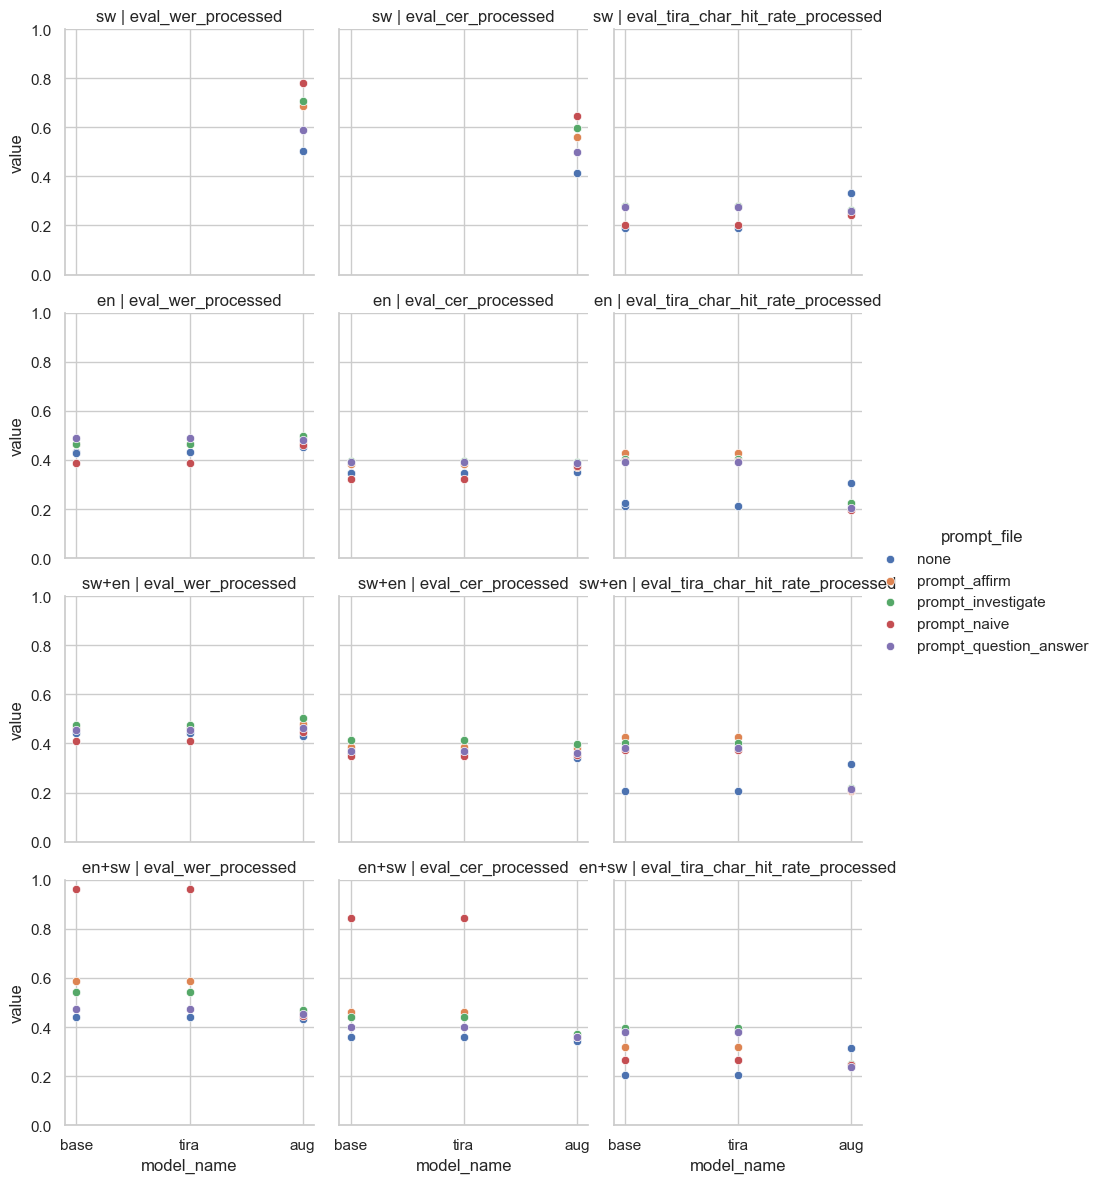

In [57]:
# plot WER and CER for each model, with different colors for each prompt file
sns.set_style("whitegrid")
# plt.figure(figsize=(12, 6))
fig=sns.FacetGrid(df, col="tag", row="language", hue="prompt_file")
fig.set_titles(col_template="{col_name}", row_template="{row_name}")
fig.map_dataframe(sns.scatterplot, x="model_name", y="value")
fig.set(ylim=(0, 1))
fig.add_legend()
plt.show()